# Solving Ordinary Differential Equations (ODEs)

Consider the ordinary differential equation **ODE**
$$
y' = \lambda y, \qquad t \ge 0
$$
with initial condition
$$
y(0) = 1
$$
The exact solution is
$$
y(t) = \exp(\lambda t)
$$
and more general if $y(0) = y_0$ we obtain the solution
$$
y(t)=y_0\exp(\lambda t).
$$

In [73]:
import matplotlib.pyplot as plt
import numpy as np

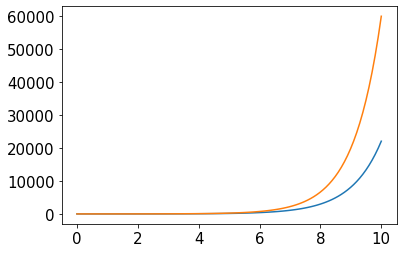

In [74]:
t0,y0,T = 0.0,1.0,10.0
te = np.linspace(t0,T,100)
y=np.exp(te)
plt.plot(te,y)
lmbd = 1.1
y=np.exp(lmbd*te)
plt.plot(te,y)


Numerical methods for solving ordinary differential equations are methods used to find numerical approximations. Many differential equations **cannot** be solved using analytical solutions. For practical purposes, a numeric approximation to the solution is often sufficient. The algorithms studied here can be used to compute such an approximation. An alternative method is to use techniques from calculus to obtain a series expansion of the solution.

We now have the following equation
$$
y'(t)=f(t,y(t))
$$
where we numerically need to approximate the solution via an approximation of the time derivative
$$
y'(t)=\frac{y(t+h)-y(t)}{h}=f(t,y(t))
$$
and we start from the initial value $y_0$. 

This initial condition now propagates over time via reformulating the above to an iteration 
$$
y(t+h)=y(t)+hf(t,y(t))
$$
and since the values $y(t)$ refer to exact solution evaluated at different times we now introduce the notation $y_k\approx y(kh)$ and arrive at the first method for solving the ODE
$$
y_{k+1}=y_k+hf(t_k,y_k).
$$
This is the so-called **explicit Euler** method as the approximation of the new solution only depends on *old* values.

Right hand side function for our differential equation

In [42]:
def f(t,y):
    return y

with the exact solution

In [43]:
def yexact(t):
    return np.exp(t)

This implements forward/explicit Euler method
$$
y_{k+1}=y_k+hf(t_k,y_k).
$$

In [45]:
def euler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1] + h*f(t[n-1],y[n-1])
        t[n] = t[n-1] + h
    return t, y

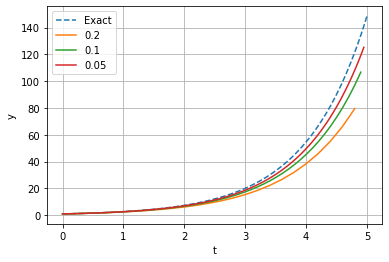

In [9]:
t0,y0,T = 0.0,1.0,5.0

te = np.linspace(t0,T,100)
ye = yexact(te)
plt.plot(te,ye,'--')

H = [0.2,0.1,0.05]

for h in H:
    t,y = euler(t0,T,y0,h)
    plt.plot(t,y)

plt.legend(('Exact','0.2','0.1','0.05'),loc=2)
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True);

Conside the ODE
$$
y' = -y + 2 \exp(-t) \cos(2t)
$$
with initial condition
$$
y(0) = 0
$$
The exact solution is
$$
y(t) = \exp(-t) \sin(2t)
$$

In [10]:
def f(t,y):
    return -y + 2.0*np.exp(-t)*np.cos(2.0*t)

def yexact(t):
    return np.exp(-t)*np.sin(2.0*t)

Text(0.5, 1.0, 'Step size = 0.05')

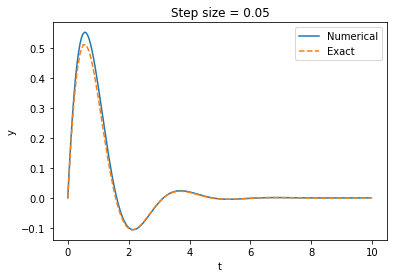

In [11]:
t0 = 0
T  = 10
h  = 1.0/20.0
t,y = euler(t0,T,0,h)
te = np.linspace(t0,T,100)
ye = yexact(te)
plt.plot(t,y,te,ye,'--')
plt.legend(('Numerical','Exact'))
plt.xlabel('t')
plt.ylabel('y')
plt.title('Step size = ' + str(h))

Study the effect of decreasing step size. The error is plotted in log scale.

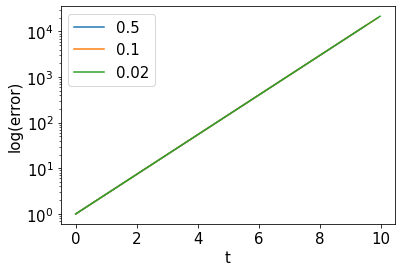

In [47]:
hh = [1.0/2.0, 1.0/10.0, 1.0/50.0]
for h in hh:
    t,y = euler(t0,T,0,h)
    ye = yexact(t)
    plt.semilogy(t,np.abs(y-ye))
    plt.legend(hh)
    plt.xlabel('t')
    plt.ylabel('log(error)')

All looks lovely now but why are we not done yet?

## Instability of forward Euler scheme

Consider the ODE
$$
y' = -5 t y^2 + \frac{5}{t} - \frac{1}{t^2}, \qquad t \ge 1
$$
with initial condition
$$
y(1) = 1
$$
The exact solution is
$$
y(t) = \frac{1}{t}
$$

In [50]:
def f(t,y):
    return -5.0*t*y**2 + 5.0/t - 1.0/t**2

def yexact(t):
    return 1.0/t

Number of iterations= 126


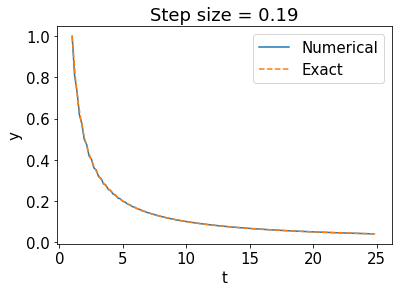

In [51]:
t0 = 1.0
y0 = 1.0
T  = 25.0
h  = 0.19
t,y = euler(t0,T,y0,h)
print('Number of iterations=',len(t))
te = np.linspace(t0,T,100)
ye = yexact(te)
plt.plot(t,y,te,ye,'--')
plt.legend(('Numerical','Exact'))
plt.xlabel('t')
plt.ylabel('y')
plt.title('Step size = ' + str(h));

So until now everything looks great but what if we change the parameter $h$ slightly. This will be an issue of stability.

Number of iterations= 114


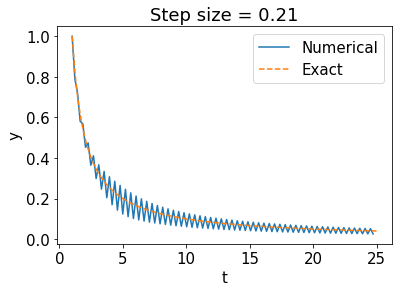

In [54]:
h  = 0.21
t,y = euler(t0,T,y0,h)
print('Number of iterations=',len(t))
plt.plot(t,y,te,ye,'--')
plt.legend(('Numerical','Exact'))
plt.xlabel('t')
plt.ylabel('y')
plt.title('Step size = ' + str(h));

We will use a variable time step
$$
y_n = y_{n-1} + h_{n-1} f(t_{n-1}, y_{n-1})
$$
where
$$
h_{n-1} = \frac{1}{|f_y(t_{n-1},y_{n-1})|} = \frac{1}{10 t_{n-1} |y_{n-1}|}
$$
more sophisticated techniques are discussed in our Numerical methods for ODEs lecture.

In [55]:
def aeuler(t0,T,y0):
    # Forward Euler with adaptive time-stepping
    t, y = [], []
    y.append(y0)
    t.append(t0)
    time = t0; n = 1
    while time < T:
        h    = 1.0/np.abs(10*t[n-1]*y[n-1])
        y.append(y[n-1] + h*f(t[n-1],y[n-1]))
        time = time + h
        t.append(time)
        n = n + 1
    return np.array(t), np.array(y)

Number of iterations= 241


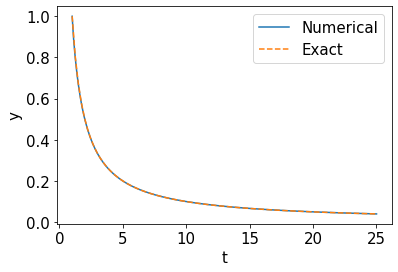

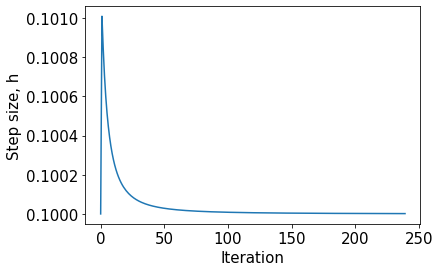

In [56]:
t,y = aeuler(t0,T,y0)
print('Number of iterations=',len(t))

plt.plot(t,y,te,ye,'--')
plt.legend(('Numerical','Exact'))
plt.xlabel('t')
plt.ylabel('y');

plt.figure()
plt.plot(range(len(t)-1),t[1:]-t[0:-1])
plt.ylabel('Step size, h')
plt.xlabel('Iteration');

Now there seems to be a problem with our *explicit Euler* method and we consider a different version, namely, the **implicit Euler** scheme
$$
y(t+h)=y(t)+hf(t+h,y(t+h))
$$
and since the values $y(t)$ refer to exact solution evaluated at different times we now introduce the notation $y_k\approx y(kh)$ and arrive at the first method for solving the ODE
$$
y_{k+1}=y_k+hf(t_{k+1},y_{k+1}).
$$
This in general means solving a system to obtain the new point $y_{k+1}$ and then we get for our particular problem
$$
y_{k+1}=y_k+hy_{k+1}\Rightarrow y_{k+1}=\frac{y_k}{1-h}
$$

In [57]:
def ieuler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1]/(1-h)
        t[n] = t[n-1] + h
    return t, y

def yexact(t):
    return np.exp(t)

def f(t,y):
    return y

Number of iterations= 1000


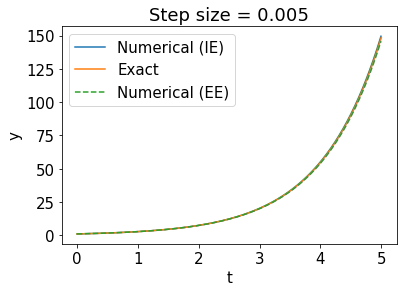

In [62]:
t0,y0,T = 0.0,1.0,5.0
h  = 0.005
t,y = ieuler(t0,T,y0,h)
t_ee,y_ee = euler(t0,T,y0,h)

print('Number of iterations=',len(t))
te = np.linspace(t0,T,100)
ye = yexact(te)
plt.plot(t,y,te,ye,t_ee,y_ee,'--')
plt.legend(('Numerical (IE)','Exact','Numerical (EE)'))
plt.xlabel('t')
plt.ylabel('y')
plt.title('Step size = ' + str(h));

For nonlinear systems the implicit Euler method requires solving nonlinear systems via a fixed point iteration or Newton's method.

Text(0, 0.5, 'y(t)')

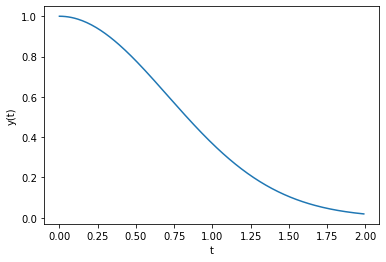

In [64]:
%matplotlib inline
from scipy.integrate import odeint
import numpy as N
import scipy

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = 1             # initial value
t0 = 0              # integration limits for t
T = 2

t = N.arange(t0, T, 0.01)  # values of t for
                          # which we require
                          # the solution y(t)
y = odeint(f, y0, t)  # actual computation of y(t)

import pylab          # plotting of results
pylab.plot(t, y)
pylab.xlabel('t'); pylab.ylabel('y(t)')



In [65]:
help(scipy.integrate.odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0, tfirst=False)
    Integrate a system of ordinary differential equations.
    
    .. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
              differential equation.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t, ...)  [or func(t, y, ...)]
    
    where y can be a vector.
    
    .. note:: By default, the required order of the first two arguments of
              `func` are in the opposite order of the arguments in the system
              definition function used by the `scipy.integrate.ode` class and
     

## Solving the pendulum equation

In this page, the second order differential equation for the angle $\theta$ of a pendulum acted on by gravity with friction is solved . The equations can be written as follows:
\begin{align}
\theta'(t)&=\omega(t)\\
\omega'(t)&=−b \ \omega(t)−c \ \mathrm{sin}(\theta(t))
\end{align}
hereafter, let:
$$
y(t)=
\left(
\begin{array}{c}
\theta(t)\\
\omega(t)\\
\end{array}
\right)
$$
with the boundary condition:
$$
y(0)=
\left(
\begin{array}{c}
\pi-0.1\\
0
\end{array}
\right)
$$
Firstly, define the function which returns dydt.

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint


In [67]:
def pend(y, t, b, c):
    # This is the right hand side function with two components
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

In [68]:
b = 0.25
c = 5.0
y0 = [np.pi - 0.1, 0.0]
t = np.linspace(0, 20, 301)

In [69]:
sol = odeint(pend, y0, t, args=(b, c))

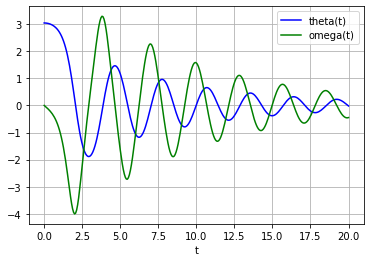

In [70]:
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

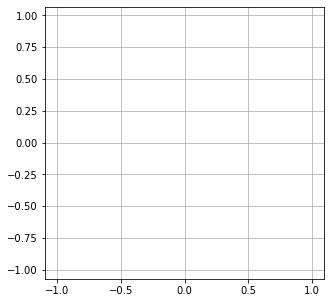

In [71]:
fig = plt.figure(figsize=(5, 5), facecolor='w')
ax = fig.add_subplot(1, 1, 1)
plt.rcParams['font.size'] = 15

lns = []
for i in range(len(sol)):
    ln, = ax.plot([0, np.sin(sol[i, 0])], [0, -np.cos(sol[i, 0])],
                  color='k', lw=2)
    tm = ax.text(-1, 0.9, 'time = %.1fs' % t[i])
    lns.append([ln, tm])
ax.set_aspect('equal', 'datalim')
ax.grid()
ani = animation.ArtistAnimation(fig, lns, interval=50)

In [72]:
fn = 'odeint_single_pendulum_artistanimation'
ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
# ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)

In [16]:
#import subprocess
#cmd = 'magick convert %s.gif -fuzz 10%% -layers Optimize %s_r.gif'%(fn,fn)
#subprocess.check_output(cmd)